In [1]:
vcf_path = '../../data/external_public/1kg_phase3/haps/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz'

In [2]:
!ls -lh {vcf_path}

-rw-rw-r-- 1 abiddanda pi-jnovembre 205M Dec  6  2016 ../../data/external_public/1kg_phase3/haps/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz


In [3]:
!zcat {vcf_path} | wc -l

1103800


In [4]:
import sys

In [5]:
import allel

In [6]:
callset = allel.read_vcf(vcf_path, fields=['numalt'],log = sys.stdout)

[read_vcf] 65536 rows in 3.79s; chunk in 3.79s (17279 rows/s); 22 :18539397
[read_vcf] 131072 rows in 7.39s; chunk in 3.59s (18231 rows/s); 22 :21016127
[read_vcf] 196608 rows in 10.99s; chunk in 3.60s (18191 rows/s); 22 :23236362
[read_vcf] 262144 rows in 14.64s; chunk in 3.65s (17931 rows/s); 22 :25227844
[read_vcf] 327680 rows in 18.27s; chunk in 3.62s (18092 rows/s); 22 :27285434
[read_vcf] 393216 rows in 21.87s; chunk in 3.61s (18167 rows/s); 22 :29572822
[read_vcf] 458752 rows in 25.48s; chunk in 3.61s (18151 rows/s); 22 :31900536
[read_vcf] 524288 rows in 29.12s; chunk in 3.64s (18024 rows/s); 22 :34069864
[read_vcf] 589824 rows in 32.77s; chunk in 3.65s (17964 rows/s); 22 :36053392
[read_vcf] 655360 rows in 36.39s; chunk in 3.62s (18093 rows/s); 22 :38088395
[read_vcf] 720896 rows in 39.99s; chunk in 3.60s (18220 rows/s); 22 :40216200
[read_vcf] 786432 rows in 43.58s; chunk in 3.59s (18265 rows/s); 22 :42597446
[read_vcf] 851968 rows in 47.19s; chunk in 3.61s (18137 rows/s); 22

In [7]:
import numpy as np
numalt = callset['variants/numalt']
np.max(numalt)

8

In [8]:
count_numalt = np.bincount(numalt)
count_numalt

array([      0, 1097199,    6073,     224,      38,       9,       3,
             0,       1])

In [9]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

6348

In [10]:
zarr_path = '../../data/external_public/1kg_phase3/haps/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.zarr'

In [11]:
import numcodecs
import zarr

In [12]:
allel.vcf_to_zarr(vcf_path, zarr_path, group='22',fields='*', alt_number=8, log=sys.stdout,compressor=numcodecs.Blosc(cname='zstd', clevel=1, shuffle=False))

[vcf_to_zarr] 65536 rows in 11.02s; chunk in 11.02s (5948 rows/s); 22 :18539397
[vcf_to_zarr] 131072 rows in 23.64s; chunk in 12.62s (5191 rows/s); 22 :21016127
[vcf_to_zarr] 196608 rows in 36.44s; chunk in 12.80s (5119 rows/s); 22 :23236362
[vcf_to_zarr] 262144 rows in 48.76s; chunk in 12.32s (5318 rows/s); 22 :25227844
[vcf_to_zarr] 327680 rows in 60.97s; chunk in 12.21s (5367 rows/s); 22 :27285434
[vcf_to_zarr] 393216 rows in 73.34s; chunk in 12.36s (5301 rows/s); 22 :29572822
[vcf_to_zarr] 458752 rows in 85.45s; chunk in 12.11s (5411 rows/s); 22 :31900536
[vcf_to_zarr] 524288 rows in 97.74s; chunk in 12.29s (5333 rows/s); 22 :34069864
[vcf_to_zarr] 589824 rows in 109.96s; chunk in 12.23s (5358 rows/s); 22 :36053392
[vcf_to_zarr] 655360 rows in 122.51s; chunk in 12.55s (5223 rows/s); 22 :38088395
[vcf_to_zarr] 720896 rows in 134.72s; chunk in 12.21s (5367 rows/s); 22 :40216200
[vcf_to_zarr] 786432 rows in 147.57s; chunk in 12.85s (5098 rows/s); 22 :42597446
[vcf_to_zarr] 851968 rows

In [13]:
!du -hs {zarr_path}

151M	../../data/external_public/1kg_phase3/haps/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.zarr


In [14]:
callset_h1k = zarr.open_group(zarr_path, mode='r')
callset_h1k

<zarr.hierarchy.Group '/' read-only>

In [15]:
callset_h1k.tree(expand=True)

ModuleNotFoundError: No module named 'ipytree'

/
 └── 22
     ├── calldata
     │   └── GT (1103547, 2504, 2) int8
     ├── samples (2504,) object
     └── variants
         ├── AA (1103547,) object
         ├── AC (1103547, 8) int32
         ├── AF (1103547, 8) float32
         ├── AFR_AF (1103547, 8) float32
         ├── ALT (1103547, 8) object
         ├── AMR_AF (1103547, 8) float32
         ├── AN (1103547,) int32
         ├── CHROM (1103547,) object
         ├── CIEND (1103547, 2) int32
         ├── CIPOS (1103547, 2) int32
         ├── CS (1103547,) object
         ├── DP (1103547,) int32
         ├── EAS_AF (1103547, 8) float32
         ├── END (1103547,) int32
         ├── EUR_AF (1103547, 8) float32
         ├── EX_TARGET (1103547,) bool
         ├── FILTER_PASS (1103547,) bool
         ├── ID (1103547,) object
         ├── IMPRECISE (1103547,) bool
         ├── MC (1103547,) object
         ├── MEINFO (1103547, 4) object
         ├── MEND (1103547,) int32
         ├── MLEN (1103547,) int32
         ├── MSTART (1103547,) 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
pos = allel.SortedIndex(callset_h1k['22/variants/POS'])
pos

0,1,2,3,4,...,1103542,1103543,1103544,1103545,1103546
16050075,16050115,16050213,16050319,16050527,...,51241342,51241386,51244163,51244205,51244237


In [18]:
def plot_windowed_variant_density(pos, window_size, title=None):
    bins = np.arange(0,pos.max(), window_size)
    x = (bins[1:]+bins[:-1])/2
    h,_ =np.histogram(pos, bins=bins)
    y = h/window_size
    fig, ax=plt.subplots(figsize=(12,3))
    sns.despine(ax=ax,offset=10)
    ax.plot(x,y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)

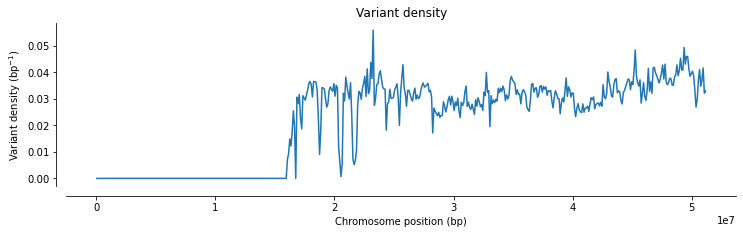

In [19]:
plot_windowed_variant_density(pos, window_size=100000, title='Variant density')

In [28]:
gt = allel.GenotypeDaskArray(callset_h1k['22/calldata/GT'])
gt

<GenotypeDaskArray shape=(1103547, 2504, 2) dtype=int8>

In [29]:
%%time
ac = gt.count_alleles(max_allele=8).compute()

CPU times: user 17.4 s, sys: 410 ms, total: 17.8 s
Wall time: 29.7 s


In [30]:
ac

<AlleleCountsArray shape=(1103547, 9) dtype=int32>
5007    1    0    0    0    0    0    0    0
4976   32    0    0    0    0    0    0    0
4970   38    0    0    0    0    0    0    0
...
4969   39    0    0    0    0    0    0    0
5007    1    0    0    0    0    0    0    0
4989   19    0    0    0    0    0    0    0